# Lead Scoring Case Study

## Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, we need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed me to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires me to build a model wherein I'll need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals and Objectives
There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## The steps followed would be as follows:

- Read and understand the data 
- Clean the data
- Prepare the data for Model Building
- Model Building
- Model Evaluation
- Making Predictions on the Test Set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

# 1. Loading Data

In [2]:
# Read the file and import it to dataframe
xleads = pd.read_csv("Leads.csv")

# Taking a glance at the first few entries
xleads.head(10)


Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   
5  2058ef08-2858-443e-a01f-a9237db2f5ce       660680                      API   
6  9fae7df4-169d-489b-afe4-0f3d752542ed       660673  Landing Page Submission   
7  20ef72a2-fb3b-45e0-924e-551c5fa59095       660664                      API   
8  cfa0128c-a0da-4656-9d47-0aa4e67bf690       660624  Landing Page Submission   
9  af465dfc-7204-4130-9e05-33231863c4b5       660616                      API   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   
5      Olark Chat           No          No          0          0.0   
6          Google           No          No          1          2.0   
7      Olark Chat           No          No          0          0.0   
8  Direct Traffic           No          No          0          2.0   
9          Google           No          No          0          4.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   
5                            0                   0.0  ...   
6                         1640                   2.0  ...   
7                            0                   0.0  ...   
8                           71                   2.0  ...   
9                           58                   4.0  ...   

  Get updates on DM Content    Lead Profile               City  \
0                        No          Select             Select   
1                        No          Select             Select   
2                        No  Potential Lead             Mumbai   
3                        No          Select             Mumbai   
4                        No          Select             Mumbai   
5                        No             NaN                NaN   
6                        No  Potential Lead             Mumbai   
7                        No             NaN                NaN   
8                        No             NaN  Thane & Outskirts   
9                        No             NaN             Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   
5                     01.High                  02.Medium   
6                   02.Medium                    01.High   
7                   02.Medium                  02.Medium   
8                   02.Medium                  02.Medium   
9                   02.Medium                  02.Medium   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4    

In [3]:
# Understanding the shape of the data

xleads.shape


(9240, 37)

In [4]:
# List the columns in the data

xleads.columns


Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [5]:
# Get data description

xleads.describe()


Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [6]:
# Understanding the feature variables and null data if present

xleads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- There seems quite a few categorical variables present in this data for which we will need to create dummy variables. Also, there are a lot of null values present as well, so we will need to treat them accordingly.

# 2.  Data Cleaning and Preparation

In [7]:
# Check the number of missing values in each column

xleads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

- There are a lot of column which have high number of missing values. Clearly, these columns are not useful. Since, there are 9000 datapoints in our dataframe, let's eliminate the columns having greater than 3000 missing values as they are of no use to us.

In [8]:
# Drop all the columns in which has more than 3000 missing values

for col in xleads.columns:
    if xleads[col].isnull().sum() > 3000:
        xleads.drop(col, 1, inplace=True)

In [9]:
# Re-check the number of null values

xleads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

- variable City and Country won't be of any use in our analysis, so we can drop it

In [10]:
xleads.drop(['City'], axis = 1, inplace = True)
xleads.drop(['Country'], axis = 1, inplace = True)


In [11]:
# Let's now check the percentage of missing values in each column

round(100*(xleads.isnull().sum()/len(xleads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [12]:
# ReCheck the number of null values

xleads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

- Now recall that there are a few columns in which there is a level called 'Select' which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.

In [13]:
# Get the value counts of all the columns

for column in xleads:
    print(xleads[column].astype('category').value_counts())
    print('val count -->            ')
    

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
val count -->            
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
val count -->            
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
val count -->            
Google               2868
Direct Traffic    

- Clearly the levels Lead Profile and How did you hear about X Education have a lot of rows which have the value Select which is of no use to the analysis so it's best that we drop them.

- Also notice that when you got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include `Do Not Call`, `Search`, `Magazine`, `Newspaper Article`, `X Education Forums`, `Newspaper`, `Digital Advertisement`, `Through Recommendations`, `Receive More Updates About Our Courses`, `Update me on Supply Chain Content`, `Get updates on DM Content`, `I agree to pay the amount through cheque`. Since practically all of the values for these variables are `No`, it's best that we drop these columns as they won't help with our analysis.

In [14]:
xleads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)
xleads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

- Also, the variable `What matters most to you in choosing a course` has the level `Better Career Prospects` `6528` times while the other two levels appear once twice and once respectively. So we should drop this column as well.

In [15]:
xleads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [16]:
# Drop the null value rows present in the variable 'What matters most to you in choosing a course'

xleads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [17]:
# Check the number of null values again

xleads.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

- Now, there's the column `What is your current occupation` which has a lot of null values. Now you can drop the entire row but since we have already lost so many feature variables, we choose not to drop it as it might turn out to be significant in the analysis. So let's just drop the null rows for the column `What is you current occupation`.

In [18]:
xleads = xleads[~pd.isnull(xleads['What is your current occupation'])]

In [19]:
# Check the number of null values again

xleads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

- Since now the number of null values present in the columns are quite small we can simply drop the rows in which these null values are present.

In [20]:
# Drop the null value rows in the column 'TotalVisits'

xleads = xleads[~pd.isnull(xleads['TotalVisits'])]

In [21]:
# Check the null values again

xleads.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [22]:
# Drop the null values rows in the column 'Lead Source'

xleads = xleads[~pd.isnull(xleads['Lead Source'])]

In [23]:
# Check the number of null values again

xleads.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [24]:
# Drop the null values rows in the column 'Specialization'

xleads = xleads[~pd.isnull(xleads['Specialization'])]

In [25]:
# Re check the number of null values

xleads.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

- Now, data doesn't have any null values. Let's now check the percentage of rows that we have retained.

In [26]:
print(len(xleads.index))
print(len(xleads.index)/9240)

6373
0.6897186147186147


- We still have around 68% of the rows which seems good enough.

In [27]:
# Dropping prospect id and lead number as they wont be helpful in the further analysis

xleads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

# 3. Preparing the data for modelling

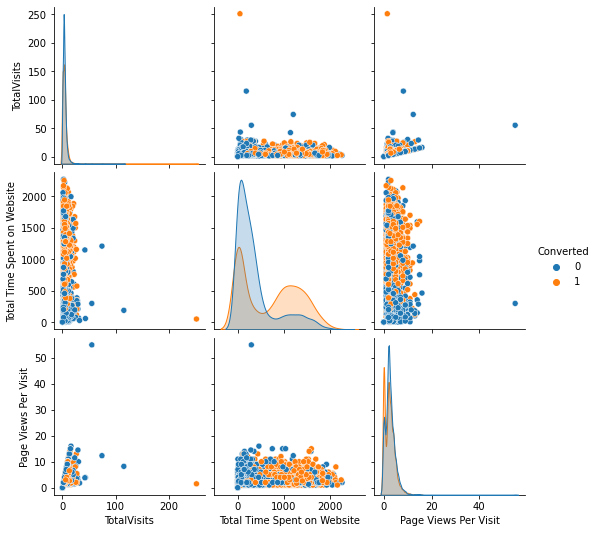

In [28]:
sns.pairplot(xleads,diag_kind='kde',hue='Converted')
plt.show()

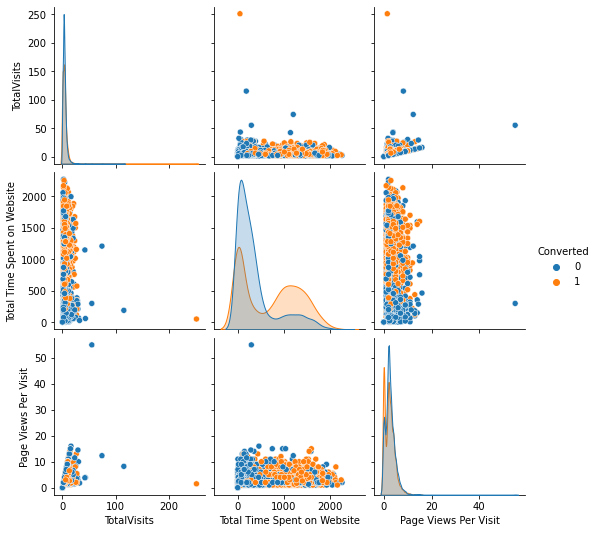

In [29]:
xedu = xleads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(xedu,diag_kind='kde',hue='Converted')
plt.show()

In [30]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformedxedu = pd.DataFrame(pt.fit_transform(xedu))
transformedxedu.columns = xedu.columns
transformedxedu.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  Converted
0    -1.539988                    -1.532509             -1.534722  -0.962570
1     0.690854                     0.641870              0.230818  -0.962570
2    -0.219742                     1.262512             -0.019004   1.038885
3    -0.723932                     0.153656             -0.629842  -0.962570
4    -0.219742                     1.204175             -0.629842   1.038885

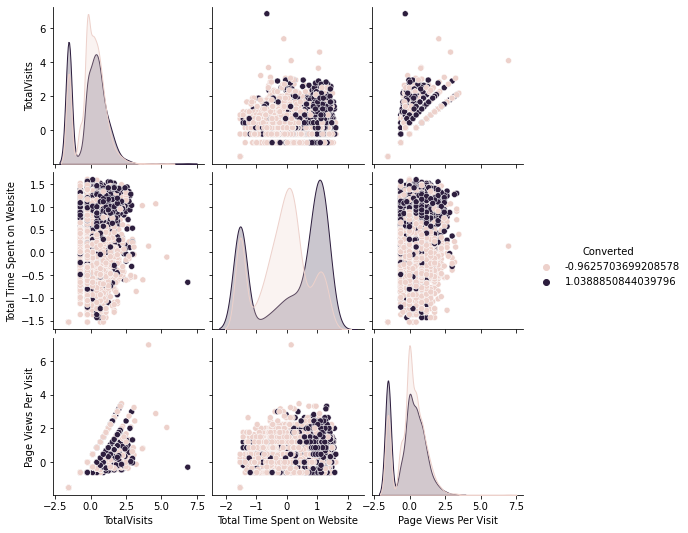

In [31]:
sns.pairplot(transformedxedu,diag_kind='kde',hue='Converted')
plt.show()

## 3.1 Dummy Variable Creation

The next step is to deal with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables.

In [32]:
# Check the columns which are of type 'object'

temp = xleads.loc[:, xleads.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [33]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(xleads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
xleads = pd.concat([xleads, dummy], axis=1)

In [34]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(xleads['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
xleads = pd.concat([xleads, dummy_spl], axis = 1)

In [35]:
# Drop the variables for which the dummy variables have been created

xleads = xleads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [36]:
# New data desc

xleads.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  ...  Specialization_IT Projects Management  \
0                   0  ...                                      0   
1                   0  ...                                      0   
2                   0  ...                                      0   
3                   0  ...                                      0   
4                   1  ...                                      0   

   Specialization_International Business  Specialization_Marketing Management  \
0                                      0                                    0   
1                                      0                                    0   
2                                      0                                    0   
3                                      0                                    0   
4                                      0                                    0   

   Specialization_Media and Advertising  Specialization_Operations Management  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     1                                     0   
4                                     0                                     0   

   Specialization_Retail Management  Specialization_Rural and Agribusiness  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   

   Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   

   Specialization_Travel and Tourism  
0                                  0  
1                                  0  
2                                  0  
3                                  0  
4                                  0  

[5 rows x 75 columns]

## 3.2 Test-Train Split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
# Put all the feature variables in X

X = xleads.drop(['Converted'], 1)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  ...  \
0                   0                      0  ...   
1                   0                      0  ...   
2                   0                      0  ...   
3                   0                      0  ...   
4                   1                      0  ...   

   Specialization_IT Projects Management  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Specialization_International Business  Specialization_Marketing Management  \
0                                      0                                    0   
1                                      0                                    0   
2                                      0                                    0   
3                                      0                                    0   
4                                      0                                    0   

   Specialization_Media and Advertising  Specialization_Operations Management  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     1                                     0   
4                                     0                                     0   

   Specialization_Retail Management  Specialization_Rural and Agribusiness  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   

   Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   

   Specialization_Travel and Tourism  
0                                  0  
1                                  0  
2                                  0  
3                     

In [39]:
# Put the target variable in y

y = xleads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [40]:
# Split the dataset into 80% train and 20% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

Scaling in numeric variables

In [41]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
4719     0.019920                     0.632042               0.15625   
4453     0.007968                     0.693222               0.12500   
5770     0.000000                     0.000000               0.00000   
1774     0.011952                     0.556338               0.18750   
403      0.007968                     0.558099               0.12500   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
4719                                    1                          0   
4453                                    1                          0   
5770                                    0                          0   
1774                                    1                          0   
403                                     0                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
4719                        0                           0   
4453                        0                           1   
5770                        0                           0   
1774                        0                           0   
403                         0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  ...  \
4719                     0                   1                      0  ...   
4453                     0                   0                      0  ...   
5770                     0                   0                      0  ...   
1774                     0                   0                      0  ...   
403                      0                   1                      0  ...   

      Specialization_IT Projects Management  \
4719                                      0   
4453                                      0   
5770                                      0   
1774                                      0   
403                                       0   

      Specialization_International Business  \
4719                                      0   
4453                                      0   
5770                                      0   
1774                                      0   
403                                       0   

      Specialization_Marketing Management  \
4719                                    0   
4453                                    0   
5770                                    0   
1774                                    0   
403                                     0   

      Specialization_Media and Advertising  \
4719                                     0   
4453                                     0   
5770                                     0   
1774                                     0   
403                                      0   

      Specialization_Operations Management  Specialization_Retail Management  \
4719                                     0                                 0   
4453                                     0                                 0   
5770                                     0                                 0   
1774                                     0                                 0   
403                                      0                                 0   

      Specialization_Rural and Agribusiness  \
4719                                      0   
4453                                      0   
5770                                      0   
1774                                      0   
403                                       0   

      Specialization_Services Excellence  \
4719                                   0   
4453                                   0   
5770                                   0   
1774                                   0   
403                                    0   

      Specialization_Supply Chain Management  \
4719                                       0   
4453                                       0   
5770             

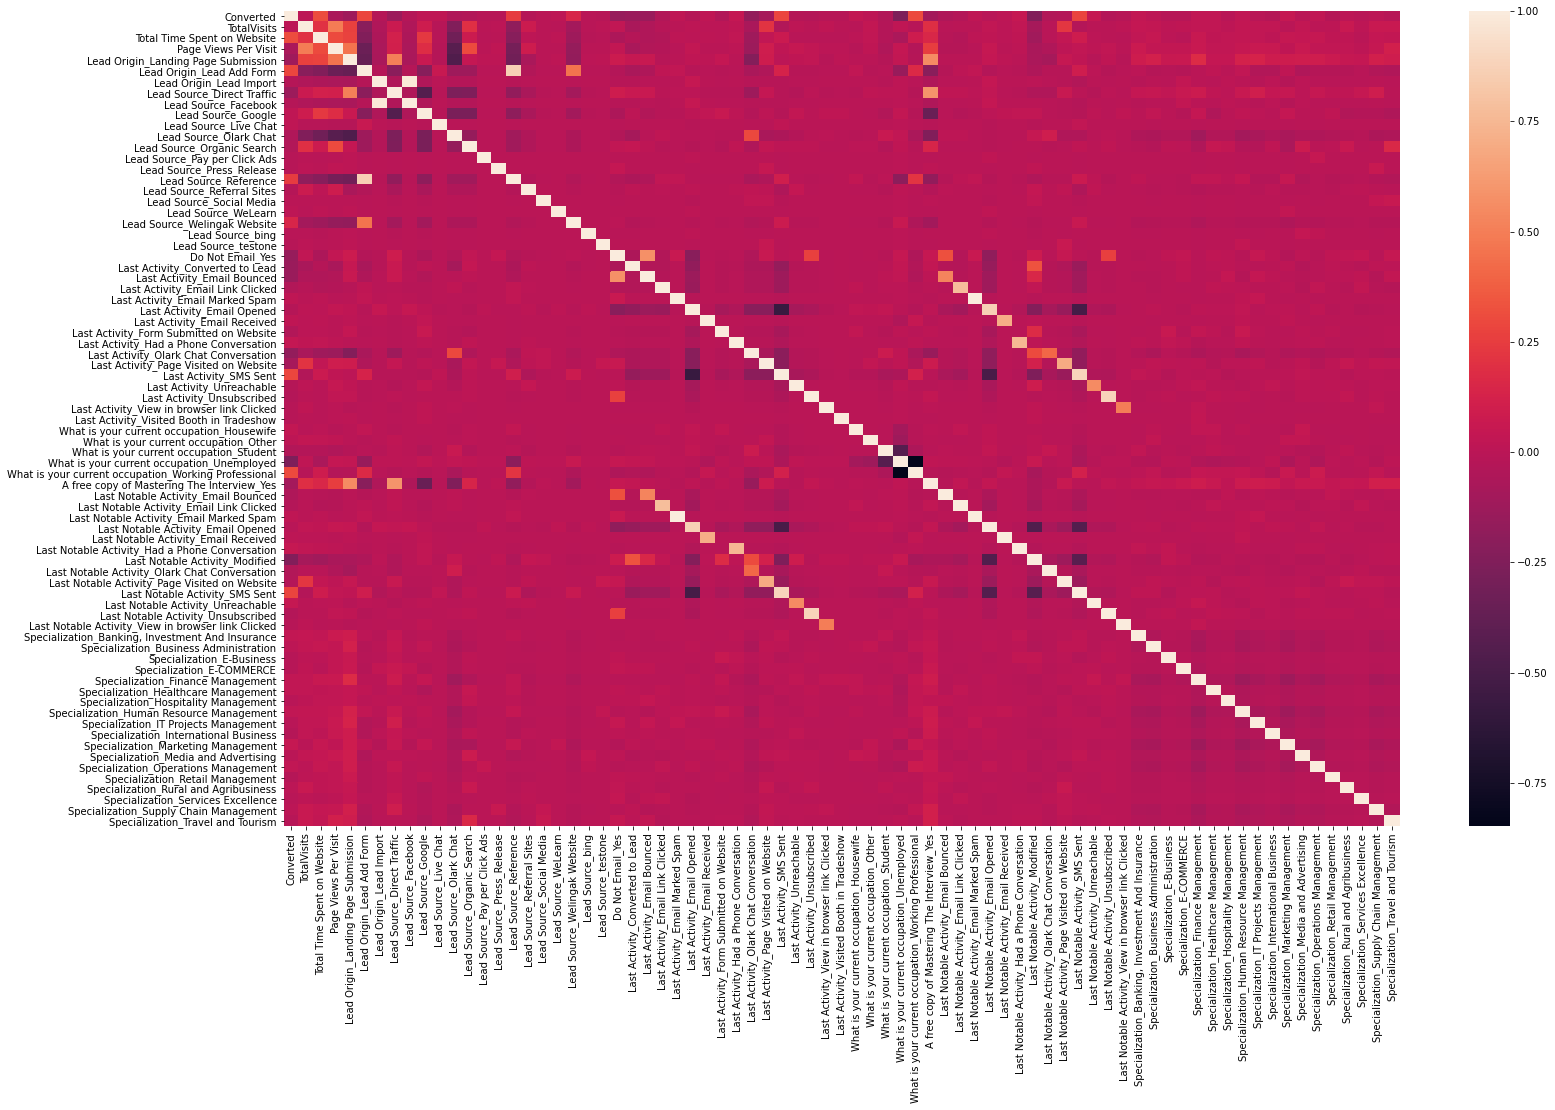

In [42]:
# Looking correlations by plotting it in a heatmap
plt.figure(figsize = (25,15))
sns.heatmap(xleads.corr())
plt.show()

# 4. Model Building 

In [43]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()



In [44]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, step = 15)             
rfe = rfe.fit(X_train, y_train)



In [45]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Source_Direct Traffic', False, 2),
 ('Lead Source_Facebook', False, 4),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Live Chat', False, 4),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 2),
 ('Lead Source_Pay per Click Ads', False, 4),
 ('Lead Source_Press_Release', False, 4),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 3),
 ('Lead Source_Social Media', False, 4),
 ('Lead Source_WeLearn', False, 3),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 3),
 ('Lead Source_testone', False, 3),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 2),

In [46]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

Now you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [47]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [48]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5098
Model:                            GLM   Df Residuals:                     5060
Model Family:                Binomial   Df Model:                           37
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2254.4
Date:                Mon, 09 May 2022   Deviance:                       4508.8
Time:                        17:29:13   Pearson chi2:                 5.20e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5649      0.629      0.898      0.369      -0.668       1.798
TotalVisits                                             13.6741      3.154      4.335      0.000       7.492      19.856
Total Time Spent on Website                              4.4606      0.179     24.930      0.000       4.110       4.811
Page Views Per Visit                                    -1.2780      0.426     -3.002      0.003      -2.112      -0.444
Lead Origin_Landing Page Submission                     -0.7836      0.116     -6.757      0.000      -1.011      -0.556
Lead Origin_Lead Add Form                                2.1256      1.164      1.827      0.068      -0.155       4.406
Lead Source_Olark Chat                                   1.1815      0.146      8.091      0.000       0.895       1.468
Lead Source_Reference                                    1.3251      1.180      1.123      0.261      -0.987       3.637
Lead Source_Welingak Website                             4.0023      1.536      2.605      0.009       0.991       7.014
Do Not Email_Yes                                        -1.3979      0.210     -6.666      0.000      -1.809      -0.987
Last Activity_Converted to Lead                         -0.8836      0.224     -3.937      0.000      -1.324      -0.444
Last Activity_Email Bounced                             -1.0606      0.394     -2.690      0.007      -1.833      -0.288
Last Activity_Had a Phone Conversation                   1.0572      0.972      1.087      0.277      -0.848       2.963
Last Activity_Olark Chat Conversation                   -1.4387      0.193     -7.463      0.000      -1.817      -1.061
Last Activity_Page Visited on Website                   -0.6119      0.233     -2.623      0.009      -1.069      -0.155
What is your current occupation_Housewife               22.6269   2.41e+04      0.001      0.999   -4.73e+04    4.73e+04
What is your current occupation_Student                 -1.0233      0.646     -1.585      0.113      -2.289       0.242
What is your current occupation_Unemployed              -1.2522      0.612     -2.048      0.041      -2.451      -0.054
What is your current occupation_Working Professional     1.2832      0.636      2.018      0.044       0.037       2.530
Last Notable Activity_Email Link Clicked                -1.6968      0.275     -6.163      0.000      -2.236      -1.157
Last Notable Activity_Email Opened                      -1.0972      0.093    -11.848      0.000      -1.279      -0.916
Last Notable Activity_Had a Phone Conversation          21.4783   1.84e+04      0.001      0.999    -3.6e+04    3.61e+04
Last Notable Activity_Modified                          -1

There are quite a few variable which have a p-value greater than `0.05`. We will need to take care of them. But first, let's also look at the VIFs.

In [49]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
4                           Lead Origin_Lead Add Form  94.15
6                               Lead Source_Reference  73.21
7                        Lead Source_Welingak Website  21.68
16         What is your current occupation_Unemployed  11.22
3                 Lead Origin_Landing Page Submission   5.46
2                                Page Views Per Visit   4.70
21                     Last Notable Activity_Modified   2.74
11             Last Activity_Had a Phone Conversation   2.53
20     Last Notable Activity_Had a Phone Conversation   2.53
17  What is your current occupation_Working Profes...   2.46
1                         Total Time Spent on Website   2.45
13              Last Activity_Page Visited on Website   2.38
5                              Lead Source_Olark Chat   2.30
22      Last Notable Activity_Page Visited on Website   2.28
19                 Last Notable Activity_Email Opened   2.12
0                                         TotalVisits   2.02
8                                    Do Not Email_Yes   1.71
28                  Specialization_Finance Management   1.68
10                        Last Activity_Email Bounced   1.66
30           Specialization_Human Resource Management   1.58
32                Specialization_Marketing Management   1.52
15            What is your current occupation_Student   1.41
12              Last Activity_Olark Chat Conversation   1.41
9                     Last Activity_Converted to Lead   1.36
33               Specialization_Operations Management   1.33
25             Specialization_Business Administration   1.29
31              Specialization_IT Projects Management   1.28
24   Specialization_Banking, Investment And Insurance   1.23
35             Specialization_Supply Chain Management   1.23
36                  Specialization_Travel and Tourism   1.15
29               Specialization_Healthcare Management   1.11
27                          Specialization_E-COMMERCE   1.07
18           Last Notable Activity_Email Link Clicked   1.07
34              Specialization_Rural and Agribusiness   1.06
26                          Specialization_E-Business   1.05
14          What is your current occupation_Housewife   1.03
23                  Last Notable Activity_Unreachable   1.02

VIFs seem to be in a decent range except for three variables. 

Let's first drop the variable `Lead Source_Reference` since it has a high p-value as well as a high VIF.

In [50]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

In [51]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5098
Model:                            GLM   Df Residuals:                     5061
Model Family:                Binomial   Df Model:                           36
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2254.9
Date:                Mon, 09 May 2022   Deviance:                       4509.8
Time:                        17:29:15   Pearson chi2:                 5.19e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5643      0.629      0.897      0.370      -0.669       1.797
TotalVisits                                             13.6701      3.154      4.334      0.000       7.488      19.852
Total Time Spent on Website                              4.4601      0.179     24.925      0.000       4.109       4.811
Page Views Per Visit                                    -1.2780      0.426     -3.002      0.003      -2.112      -0.444
Lead Origin_Landing Page Submission                     -0.7832      0.116     -6.754      0.000      -1.010      -0.556
Lead Origin_Lead Add Form                                3.4169      0.253     13.484      0.000       2.920       3.914
Lead Source_Olark Chat                                   1.1810      0.146      8.086      0.000       0.895       1.467
Lead Source_Welingak Website                             2.7102      1.033      2.623      0.009       0.685       4.735
Do Not Email_Yes                                        -1.3953      0.210     -6.659      0.000      -1.806      -0.985
Last Activity_Converted to Lead                         -0.8840      0.224     -3.939      0.000      -1.324      -0.444
Last Activity_Email Bounced                             -1.0628      0.394     -2.696      0.007      -1.835      -0.290
Last Activity_Had a Phone Conversation                   1.0589      0.972      1.089      0.276      -0.846       2.964
Last Activity_Olark Chat Conversation                   -1.4384      0.193     -7.462      0.000      -1.816      -1.061
Last Activity_Page Visited on Website                   -0.6122      0.233     -2.623      0.009      -1.070      -0.155
What is your current occupation_Housewife               22.6290   2.42e+04      0.001      0.999   -4.73e+04    4.74e+04
What is your current occupation_Student                 -1.0221      0.646     -1.583      0.113      -2.287       0.243
What is your current occupation_Unemployed              -1.2518      0.611     -2.047      0.041      -2.450      -0.053
What is your current occupation_Working Professional     1.2843      0.636      2.020      0.043       0.038       2.531
Last Notable Activity_Email Link Clicked                -1.6935      0.275     -6.157      0.000      -2.233      -1.154
Last Notable Activity_Email Opened                      -1.0962      0.093    -11.839      0.000      -1.278      -0.915
Last Notable Activity_Had a Phone Conversation          21.4770   1.84e+04      0.001      0.999    -3.6e+04    3.61e+04
Last Notable Activity_Modified                          -1.3600      0.111    -12.248      0.000      -1.578      -1.142
Last Notable Activity_Page Visited on Website           -1

The variable `Lead Profile_Dual Specialization Student	` also needs to be dropped.

In [52]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
15         What is your current occupation_Unemployed  11.22
3                 Lead Origin_Landing Page Submission   5.46
2                                Page Views Per Visit   4.70
20                     Last Notable Activity_Modified   2.74
19     Last Notable Activity_Had a Phone Conversation   2.53
10             Last Activity_Had a Phone Conversation   2.53
16  What is your current occupation_Working Profes...   2.46
1                         Total Time Spent on Website   2.45
4                           Lead Origin_Lead Add Form   2.38
12              Last Activity_Page Visited on Website   2.38
5                              Lead Source_Olark Chat   2.30
21      Last Notable Activity_Page Visited on Website   2.28
18                 Last Notable Activity_Email Opened   2.12
0                                         TotalVisits   2.02
7                                    Do Not Email_Yes   1.71
27                  Specialization_Finance Management   1.68
9                         Last Activity_Email Bounced   1.66
29           Specialization_Human Resource Management   1.58
31                Specialization_Marketing Management   1.52
14            What is your current occupation_Student   1.41
11              Last Activity_Olark Chat Conversation   1.41
8                     Last Activity_Converted to Lead   1.36
6                        Lead Source_Welingak Website   1.36
32               Specialization_Operations Management   1.33
24             Specialization_Business Administration   1.29
30              Specialization_IT Projects Management   1.28
34             Specialization_Supply Chain Management   1.23
23   Specialization_Banking, Investment And Insurance   1.23
35                  Specialization_Travel and Tourism   1.15
28               Specialization_Healthcare Management   1.11
26                          Specialization_E-COMMERCE   1.07
17           Last Notable Activity_Email Link Clicked   1.07
33              Specialization_Rural and Agribusiness   1.06
25                          Specialization_E-Business   1.05
13          What is your current occupation_Housewife   1.03
22                  Last Notable Activity_Unreachable   1.02

The VIFs are now all less than 5. So let's drop the ones with the high p-values beginning with `Last Notable Activity_Had a Phone Conversation`.

In [53]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [54]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5098
Model:                            GLM   Df Residuals:                     5062
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2256.2
Date:                Mon, 09 May 2022   Deviance:                       4512.3
Time:                        17:29:18   Pearson chi2:                 5.20e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5634      0.629      0.896      0.370      -0.670       1.796
TotalVisits                                             13.7010      3.152      4.347      0.000       7.523      19.879
Total Time Spent on Website                              4.4573      0.179     24.912      0.000       4.107       4.808
Page Views Per Visit                                    -1.2766      0.425     -3.001      0.003      -2.110      -0.443
Lead Origin_Landing Page Submission                     -0.7813      0.116     -6.741      0.000      -1.009      -0.554
Lead Origin_Lead Add Form                                3.4192      0.253     13.489      0.000       2.922       3.916
Lead Source_Olark Chat                                   1.1832      0.146      8.100      0.000       0.897       1.470
Lead Source_Welingak Website                             2.7119      1.033      2.624      0.009       0.687       4.737
Do Not Email_Yes                                        -1.3979      0.210     -6.671      0.000      -1.809      -0.987
Last Activity_Converted to Lead                         -0.8770      0.224     -3.909      0.000      -1.317      -0.437
Last Activity_Email Bounced                             -1.0587      0.394     -2.685      0.007      -1.832      -0.286
Last Activity_Had a Phone Conversation                   1.9279      0.815      2.365      0.018       0.331       3.525
Last Activity_Olark Chat Conversation                   -1.4340      0.193     -7.438      0.000      -1.812      -1.056
Last Activity_Page Visited on Website                   -0.6061      0.233     -2.598      0.009      -1.063      -0.149
What is your current occupation_Housewife               21.6336   1.46e+04      0.001      0.999   -2.87e+04    2.87e+04
What is your current occupation_Student                 -1.0208      0.646     -1.581      0.114      -2.286       0.245
What is your current occupation_Unemployed              -1.2502      0.612     -2.044      0.041      -2.449      -0.052
What is your current occupation_Working Professional     1.2849      0.636      2.020      0.043       0.038       2.531
Last Notable Activity_Email Link Clicked                -1.6971      0.275     -6.170      0.000      -2.236      -1.158
Last Notable Activity_Email Opened                      -1.0997      0.093    -11.879      0.000      -1.281      -0.918
Last Notable Activity_Modified                          -1.3699      0.111    -12.357      0.000      -1.587      -1.153
Last Notable Activity_Page Visited on Website           -1.0189      0.324     -3.149      0.002      -1.653      -0.385
Last Notable Activity_Unreachable                        1

In [55]:
# Drop What is your current occupation_Housewife.

X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5098
Model:                            GLM   Df Residuals:                     5063
Model Family:                Binomial   Df Model:                           34
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2258.4
Date:                Mon, 09 May 2022   Deviance:                       4516.8
Time:                        17:29:19   Pearson chi2:                 5.20e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1556      0.580      1.991      0.046       0.018       2.293
TotalVisits                                             13.5510      3.143      4.311      0.000       7.390      19.712
Total Time Spent on Website                              4.4556      0.179     24.909      0.000       4.105       4.806
Page Views Per Visit                                    -1.2952      0.426     -3.044      0.002      -2.129      -0.461
Lead Origin_Landing Page Submission                     -0.7737      0.116     -6.680      0.000      -1.001      -0.547
Lead Origin_Lead Add Form                                3.4167      0.253     13.482      0.000       2.920       3.913
Lead Source_Olark Chat                                   1.1784      0.146      8.070      0.000       0.892       1.465
Lead Source_Welingak Website                             2.7091      1.033      2.622      0.009       0.684       4.734
Do Not Email_Yes                                        -1.4026      0.210     -6.688      0.000      -1.814      -0.992
Last Activity_Converted to Lead                         -0.8852      0.224     -3.947      0.000      -1.325      -0.446
Last Activity_Email Bounced                             -1.0584      0.394     -2.685      0.007      -1.831      -0.286
Last Activity_Had a Phone Conversation                   1.9256      0.815      2.364      0.018       0.329       3.522
Last Activity_Olark Chat Conversation                   -1.4363      0.193     -7.454      0.000      -1.814      -1.059
Last Activity_Page Visited on Website                   -0.6328      0.234     -2.709      0.007      -1.091      -0.175
What is your current occupation_Student                 -1.6087      0.600     -2.680      0.007      -2.785      -0.432
What is your current occupation_Unemployed              -1.8374      0.564     -3.260      0.001      -2.942      -0.733
What is your current occupation_Working Professional     0.6977      0.590      1.183      0.237      -0.459       1.854
Last Notable Activity_Email Link Clicked                -1.6949      0.275     -6.169      0.000      -2.233      -1.156
Last Notable Activity_Email Opened                      -1.1000      0.093    -11.886      0.000      -1.281      -0.919
Last Notable Activity_Modified                          -1.3649      0.111    -12.330      0.000      -1.582      -1.148
Last Notable Activity_Page Visited on Website           -0.9953      0.324     -3.073      0.002      -1.630      -0.361
Last Notable Activity_Unreachable                        1.3966      0.803      1.739      0.082      -0.178       2.971
Specialization_Banking, Investment And Insurance         1

In [56]:
# Drop `What is your current occupation_Working Professional`.
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5098
Model:                            GLM   Df Residuals:                     5064
Model Family:                Binomial   Df Model:                           33
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2259.1
Date:                Mon, 09 May 2022   Deviance:                       4518.1
Time:                        17:29:19   Pearson chi2:                 5.18e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                1.7992      0.218      8.264      0.000       1.373       2.226
TotalVisits                                         13.4725      3.142      4.287      0.000       7.314      19.631
Total Time Spent on Website                          4.4560      0.179     24.907      0.000       4.105       4.807
Page Views Per Visit                                -1.2987      0.426     -3.051      0.002      -2.133      -0.464
Lead Origin_Landing Page Submission                 -0.7720      0.116     -6.666      0.000      -0.999      -0.545
Lead Origin_Lead Add Form                            3.4172      0.253     13.484      0.000       2.920       3.914
Lead Source_Olark Chat                               1.1785      0.146      8.071      0.000       0.892       1.465
Lead Source_Welingak Website                         2.7082      1.033      2.621      0.009       0.683       4.733
Do Not Email_Yes                                    -1.4050      0.210     -6.695      0.000      -1.816      -0.994
Last Activity_Converted to Lead                     -0.8808      0.224     -3.936      0.000      -1.319      -0.442
Last Activity_Email Bounced                         -1.0508      0.393     -2.671      0.008      -1.822      -0.280
Last Activity_Had a Phone Conversation               1.9276      0.814      2.367      0.018       0.331       3.524
Last Activity_Olark Chat Conversation               -1.4349      0.193     -7.453      0.000      -1.812      -1.058
Last Activity_Page Visited on Website               -0.6535      0.234     -2.795      0.005      -1.112      -0.195
What is your current occupation_Student             -2.2502      0.271     -8.296      0.000      -2.782      -1.719
What is your current occupation_Unemployed          -2.4786      0.177    -14.038      0.000      -2.825      -2.133
Last Notable Activity_Email Link Clicked            -1.6947      0.275     -6.171      0.000      -2.233      -1.156
Last Notable Activity_Email Opened                  -1.1028      0.092    -11.924      0.000      -1.284      -0.922
Last Notable Activity_Modified                      -1.3661      0.111    -12.346      0.000      -1.583      -1.149
Last Notable Activity_Page Visited on Website       -0.9778      0.324     -3.016      0.003      -1.613      -0.342
Last Notable Activity_Unreachable                    1.3942      0.803      1.736      0.083      -0.180       2.968
Specialization_Banking, Investment And Insurance     1.0878      0.206      5.284      0.000       0.684       1.491
Specialization_Business Administration               0.6193      0.188      3.301      0.001       0.252       0.987
Specialization_E-Business                

In [57]:
# All the p-values are now in the appropriate range. Let's also check the VIFs again in case we had missed something.

# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
14        What is your current occupation_Unemployed  5.63
3                Lead Origin_Landing Page Submission  5.23
2                               Page Views Per Visit  4.25
17                    Last Notable Activity_Modified  2.61
12             Last Activity_Page Visited on Website  2.38
18     Last Notable Activity_Page Visited on Website  2.26
1                        Total Time Spent on Website  2.18
0                                        TotalVisits  2.01
16                Last Notable Activity_Email Opened  1.99
4                          Lead Origin_Lead Add Form  1.81
5                             Lead Source_Olark Chat  1.77
7                                   Do Not Email_Yes  1.71
9                        Last Activity_Email Bounced  1.65
24                 Specialization_Finance Management  1.65
26          Specialization_Human Resource Management  1.55
28               Specialization_Marketing Management  1.48
11             Last Activity_Olark Chat Conversation  1.40
6                       Lead Source_Welingak Website  1.35
8                    Last Activity_Converted to Lead  1.34
29              Specialization_Operations Management  1.30
27             Specialization_IT Projects Management  1.27
21            Specialization_Business Administration  1.27
20  Specialization_Banking, Investment And Insurance  1.22
31            Specialization_Supply Chain Management  1.22
13           What is your current occupation_Student  1.20
32                 Specialization_Travel and Tourism  1.15
25              Specialization_Healthcare Management  1.10
23                         Specialization_E-COMMERCE  1.07
15          Last Notable Activity_Email Link Clicked  1.06
30             Specialization_Rural and Agribusiness  1.06
22                         Specialization_E-Business  1.05
19                 Last Notable Activity_Unreachable  1.02
10            Last Activity_Had a Phone Conversation  1.01

# 5. Model Evaluation

In [58]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

4719    0.720721
4453    0.829566
5770    0.090961
1774    0.857825
403     0.656940
5171    0.144053
6263    0.095920
1475    0.980284
7133    0.090961
1662    0.327287
dtype: float64

In [59]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.72072135, 0.82956597, 0.09096111, 0.85782505, 0.65693975,
       0.14405258, 0.09592009, 0.98028364, 0.09096111, 0.32728736])

In [60]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
0          1         0.720721
1          1         0.829566
2          0         0.090961
3          1         0.857825
4          0         0.656940

In [61]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
0          1         0.720721          1
1          1         0.829566          1
2          0         0.090961          0
3          1         0.857825          1
4          0         0.656940          1

In [62]:
from sklearn import metrics
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Calculate the sensitivity

TP/(TP+FN)

# Calculate the specificity

TN/(TN+FP)

[[2208  441]
 [ 588 1861]]
0.7981561396626128


0.8335220838052095

## 5.1 Optimal Cut-off


In [63]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [64]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [65]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

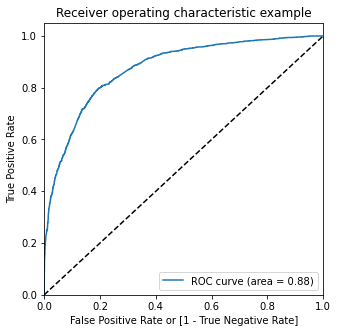

In [66]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.86 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [67]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          1         0.720721          1    1    1    1    1    1    1    1   
1          1         0.829566          1    1    1    1    1    1    1    1   
2          0         0.090961          0    1    0    0    0    0    0    0   
3          1         0.857825          1    1    1    1    1    1    1    1   
4          0         0.656940          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    1    0    0  
1    1    1    0  
2    0    0    0  
3    1    1    0  
4    0    0    0

In [68]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.480384  1.000000  0.000000
0.1   0.1  0.596705  0.983667  0.238958
0.2   0.2  0.717929  0.945692  0.507361
0.3   0.3  0.770694  0.895468  0.655342
0.4   0.4  0.790702  0.813802  0.769347
0.5   0.5  0.798156  0.759902  0.833522
0.6   0.6  0.785210  0.688444  0.874670
0.7   0.7  0.752060  0.570029  0.920347
0.8   0.8  0.720282  0.465904  0.955455
0.9   0.9  0.665555  0.320947  0.984145


In [69]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          1         0.720721          1    1    1    1    1    1    1    1   
1          1         0.829566          1    1    1    1    1    1    1    1   
2          0         0.090961          0    1    0    0    0    0    0    0   
3          1         0.857825          1    1    1    1    1    1    1    1   
4          0         0.656940          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    1    0    0                1  
1    1    1    0                1  
2    0    0    0                0  
3    1    1    0                1  
4    0    0    0                1

In [70]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)



0.7981561396626128

In [71]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2088,  561],
       [ 468, 1981]])

In [72]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [73]:
# Calculate Sensitivity

TP/(TP+FN)


0.8089015924867293

In [74]:
# Calculate Specificity

TN/(TN+FP)

0.7882219705549264

# 6. Predictions on the Test Data Set

In [75]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [76]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
4771     0.000000                     0.000000                0.0000   
6122     0.027888                     0.029049                0.4375   
9202     0.015936                     0.416813                0.2500   
6570     0.011952                     0.378961                0.1875   
2668     0.031873                     0.395246                0.2500   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
4771                                    0                          1   
6122                                    1                          0   
9202                                    1                          0   
6570                                    1                          0   
2668                                    1                          0   

      Lead Source_Olark Chat  Lead Source_Reference  \
4771                       0                      1   
6122                       0                      0   
9202                       0                      0   
6570                       0                      0   
2668                       0                      0   

      Lead Source_Welingak Website  Do Not Email_Yes  \
4771                             0                 0   
6122                             0                 0   
9202                             0                 0   
6570                             0                 1   
2668                             0                 0   

      Last Activity_Converted to Lead  ...  Specialization_E-COMMERCE  \
4771                                0  ...                          0   
6122                                0  ...                          0   
9202                                0  ...                          0   
6570                                0  ...                          0   
2668                                0  ...                          0   

      Specialization_Finance Management  Specialization_Healthcare Management  \
4771                                  0                                     0   
6122                                  0                                     0   
9202                                  1                                     0   
6570                                  0                                     0   
2668                                  0                                     0   

      Specialization_Human Resource Management  \
4771                                         0   
6122                                         1   
9202                                         0   
6570                                         0   
2668                                         0   

      Specialization_IT Projects Management  \
4771                                      0   
6122                                      0   
9202                                      0   
6570                                      0   
2668                                      0   

      Specialization_Marketing Management  \
4771                                    0   
6122                                    0   
9202                                    0   
6570                                    0   
2668                                    0   

      Specialization_Operations Management  \
4771                                     1   
6122                                     0   
9202                                     0   
6570                                     0   
2668                                     0   

      Specialization_Rural and Agribusiness  \
4771                                      0   
6122                                      0   
9202                                      0   
6570                                      0   
2668                                      0   

      Specialization_Supply Chain Management  \
4771                                       0   
6122                               

In [77]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [78]:
# Check X_test_sm

X_test_sm

const  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
4771    1.0     0.000000                     0.000000              0.000000   
6122    1.0     0.027888                     0.029049              0.437500   
9202    1.0     0.015936                     0.416813              0.250000   
6570    1.0     0.011952                     0.378961              0.187500   
2668    1.0     0.031873                     0.395246              0.250000   
...     ...          ...                          ...                   ...   
4818    1.0     0.011952                     0.002201              0.187500   
8885    1.0     0.015936                     0.589789              0.125000   
4786    1.0     0.000000                     0.000000              0.000000   
6702    1.0     0.103586                     0.509243              0.135625   
1254    1.0     0.023904                     0.457746              0.375000   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
4771                                    0                          1   
6122                                    1                          0   
9202                                    1                          0   
6570                                    1                          0   
2668                                    1                          0   
...                                   ...                        ...   
4818                                    1                          0   
8885                                    1                          0   
4786                                    0                          1   
6702                                    0                          0   
1254                                    1                          0   

      Lead Source_Olark Chat  Lead Source_Reference  \
4771                       0                      1   
6122                       0                      0   
9202                       0                      0   
6570                       0                      0   
2668                       0                      0   
...                      ...                    ...   
4818                       0                      0   
8885                       0                      0   
4786                       0                      1   
6702                       0                      0   
1254                       0                      0   

      Lead Source_Welingak Website  Do Not Email_Yes  ...  \
4771                             0                 0  ...   
6122                             0                 0  ...   
9202                             0                 0  ...   
6570                             0                 1  ...   
2668                             0                 0  ...   
...                            ...               ...  ...   
4818                             0                 0  ...   
8885                             0                 0  ...   
4786                             0                 0  ...   
6702                             0                 0  ...   
1254                             0                 0  ...   

      Specialization_E-COMMERCE  Specialization_Finance Management  \
4771                          0                                  0   
6122                          0                                  0   
9202                          0                                  1   
6570                          0                                  0   
2668                          0                                  0   
...                         ...                                ...   
4818                          0                                  0   
8885                          0                                  0   
4786                          0                                  0   
6702                          0                                  0   
1254                        

In [79]:
# Drop the required columns from X_test as well

X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation'], 1, inplace = True)

In [80]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [81]:
y_test_pred[:10]

4771    0.996996
6122    0.119539
9202    0.734123
6570    0.347288
2668    0.420499
4233    0.908250
3368    0.786633
9091    0.398792
5972    0.115148
3631    0.785068
dtype: float64

In [82]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [83]:
# Let's see the head

y_pred_1.head()

0
4771  0.996996
6122  0.119539
9202  0.734123
6570  0.347288
2668  0.420499

In [84]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [85]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [86]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [87]:
# Check 'y_pred_final'

y_pred_final.head()

Converted         0
0          1  0.996996
1          0  0.119539
2          0  0.734123
3          1  0.347288
4          1  0.420499

In [88]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [89]:
# Let's see the head of y_pred_final

y_pred_final.head()

Converted  Conversion_Prob
0          1         0.996996
1          0         0.119539
2          0         0.734123
3          1         0.347288
4          1         0.420499

In [90]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [91]:
# Check y_pred_final

y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          1         0.996996                1
1          0         0.119539                0
2          0         0.734123                1
3          1         0.347288                0
4          1         0.420499                1

In [92]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7686274509803922

In [93]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[501, 158],
       [137, 479]])

In [94]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [95]:
# Calculate sensitivity
TP / float(TP+FN)

0.7775974025974026

In [96]:
# Calculate specificity
TN / float(TN+FP)

0.7602427921092565

# 6.1 Checking Precision and Recall

In [97]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[2208,  441],
       [ 588, 1861]])

In [98]:
# Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8084274543874891

In [99]:
# Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7599020008166598

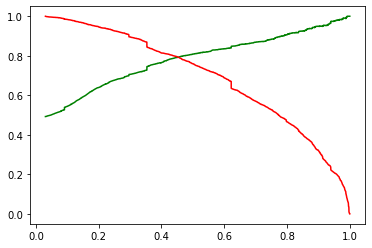

In [100]:
# Precision Recall Trade-off

from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.Predicted

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

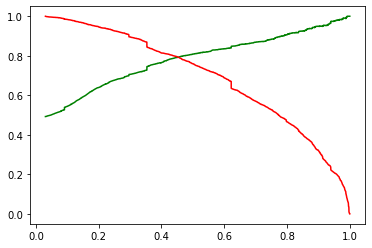

In [101]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [102]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          1         0.720721          1    1    1    1    1    1    1    1   
1          1         0.829566          1    1    1    1    1    1    1    1   
2          0         0.090961          0    1    0    0    0    0    0    0   
3          1         0.857825          1    1    1    1    1    1    1    1   
4          0         0.656940          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    1    0    0                1  
1    1    1    0                1  
2    0    0    0                0  
3    1    1    0                1  
4    0    0    0                1

In [103]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8003138485680659

In [104]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2122,  527],
       [ 491, 1958]])

In [105]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [106]:
# Calculate Precision

TP/(TP+FP)

0.7879275653923541

In [107]:
# Calculate Recall

TP/(TP+FN)

0.7995100040832993

# 6.2 Making Predictions on the Test Set


In [108]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [109]:
y_test_pred[:10]

4771    0.996996
6122    0.119539
9202    0.734123
6570    0.347288
2668    0.420499
4233    0.908250
3368    0.786633
9091    0.398792
5972    0.115148
3631    0.785068
dtype: float64

In [110]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head(10)


0
4771  0.996996
6122  0.119539
9202  0.734123
6570  0.347288
2668  0.420499
4233  0.908250
3368  0.786633
9091  0.398792
5972  0.115148
3631  0.785068

In [111]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [112]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

# Check 'y_pred_final'

y_pred_final.head()

Converted         0
0          1  0.996996
1          0  0.119539
2          0  0.734123
3          1  0.347288
4          1  0.420499

In [113]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [114]:
# Let's see the head of y_pred_final

y_pred_final.head()

Converted  Conversion_Prob
0          1         0.996996
1          0         0.119539
2          0         0.734123
3          1         0.347288
4          1         0.420499

In [115]:
# Make predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [116]:
# Check y_pred_final

y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          1         0.996996                1
1          0         0.119539                0
2          0         0.734123                1
3          1         0.347288                0
4          1         0.420499                0

In [117]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7709803921568628

In [118]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[518, 141],
       [151, 465]])

In [119]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [120]:
# Calculate Precision

TP/(TP+FP)

0.7673267326732673

In [121]:
# Calculate Recall

TP/(TP+FN)

0.7548701298701299